In [2]:
import pandas as pd

In [7]:
df= pd.read_excel(r'C:\Users\nazia\Desktop\2019 Winter Data Science Intern Challenge Data Set.xlsx')

In [8]:
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:16.597
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16.389
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42.228
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18.188


In [15]:
mean=df['order_amount'].mean()

In [21]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

<AxesSubplot:>

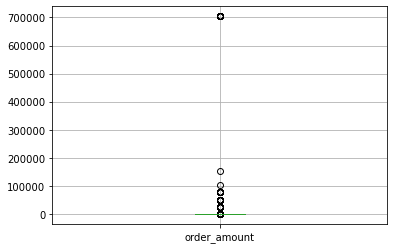

In [22]:
df.boxplot(column='order_amount')

In [23]:
unique_amounts = df.groupby(['order_amount']).size().reset_index(name='count').sort_values(by='order_amount', ascending=False)
unique_amounts.head(10)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


In [24]:
df.loc[df['order_amount'].isin([704000, 51450, 25725])].sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00.000
2969,2970,42,607,704000,2000,credit_card,2017-03-28 04:00:00.000
2835,2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00.000
4056,4057,42,607,704000,2000,credit_card,2017-03-28 04:00:00.000
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00.000
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00.000
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00.000


<AxesSubplot:>

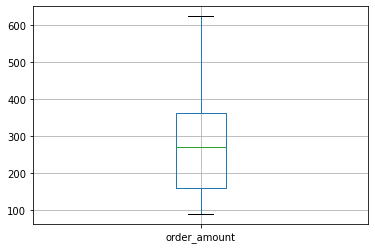

In [25]:
q1 = df.order_amount.quantile(q=0.25)
q2 = df.order_amount.quantile(q=0.5)
q3 = df.order_amount.quantile(q=0.75)
IQR = q3 - q1

df_truncated = df[(df.order_amount < q2 + IQR * 1.5) & (df.order_amount > q2 - IQR * 1.5)]
df_truncated.boxplot(column='order_amount')

b. What metric would you report for this dataset?

The distribution appears to be skewed towards lower values. With this in mind, I'd report the shortened dataset's median value. 
Values above the median will have a disproportionately large effect on the mean.

c. What is its value?

$272. It also shows that the standard deviation is 132.06.

In [27]:
df_truncated.order_amount.describe()

count    4738.000000
mean      283.814268
std       132.061996
min        90.000000
25%       161.000000
50%       272.000000
75%       362.000000
max       624.000000
Name: order_amount, dtype: float64

Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a)How many orders were shipped by Speedy Express in total?


==> 
SELECT Count(OrderID) as 'Total Orders'

FROM Orders

Where ShipperID= (select shipperID from shippers
Where Shippername='Speedy Express');

What is the last name of the employee with the most orders?

==> Select lastname 
from Employees

Where EmployeeID = (Select EmployeeID
From(Select EmployeeID, Max(Count)

From (Select EmployeeID, Count(*) as Count

From Orders
GROUP BY EmployeeID
ORDER BY COUNT(*) DESC)));

What product was ordered the most by customers in Germany?

==> Select productname from products 
Where 

productID = (select productID from 

(Select ProductID, Max(total) from

(Select ProductID, Quantity*count(Productid) as total from orderdetails
Where OrderID in (Select orderID from orders 
where

CustomerID in (select CustomerID from customers
where country='Germany'))
group by productid)));
